In [10]:
import lda

from semcable.experiment import Experiment

doc_word_mat = lda.datasets.load_reuters()
vocab = lda.datasets.load_reuters_vocab()

e = Experiment(doc_word_mat, vocab)

In [11]:
import logging
logging.disable(logging.CRITICAL)

e.fit_lda()

In [12]:
e.calculate_adjacency()

In [14]:
e.make_graph()

In [ ]:
# from collections import Counter
# c = list(Counter(e.degs).items())
# freq = np.array([a[1] for a in c], dtype=float)
# freq = freq/freq.sum()
# plt.bar(range(len(freq)), freq)
# plt.show()
# sf = np.flipud(np.sort(freq))
# plt.bar(range(len(freq)), sf);plt.show()
# plt.loglog(sf, marker='o', lw=0)

In [15]:
%matplotlib inline
sA = e.A.sum()
sA/len(e.A)

11.663691874119305

In [18]:
e.fit_powerlaw()
e.power_law_coefficients

array([-1.50523811, -0.41108982])

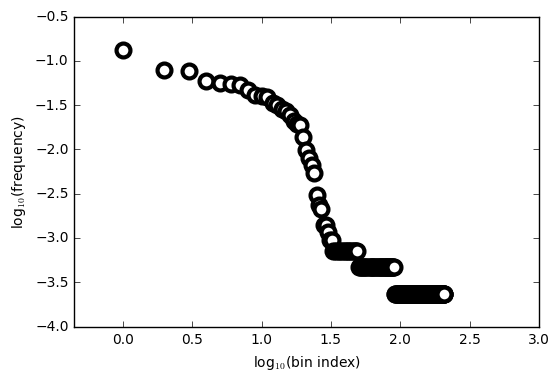

In [19]:
def plot_powerfit(experiment, title='Power law fit plot'):

    plt.plot(experiment.log_k, experiment.log_freq, marker='o', mew=3,
             color='white', lw=0, ms=10)
#    plt.plot(np.arange(n_counts)[:4],
 #            self.fit_v[:4], color='red', lw=3)
    plt.xlim([-0.35, 3])
#    plt.ylim([self.logv.min() - 0.25, 0])
    plt.xlabel('log$_{10}$(bin index)')
    plt.ylabel('log$_{10}$(frequency)')
    #plt.title('nbins = {}'.format(n_counts))
    #plt.text(1.85, -1.25, '$\\beta = %.2f$' % self.beta, fontsize=15,
    #         bbox={'facecolor': '#1E90FF', 'alpha': 0.5, 'pad': 10})
    plt.show()
    
plot_powerfit(e)

## Building the graph 

There are two steps to this process:

1. Create a subgraph by starting from cue node, get all associates. Then treat all associates as cues and see what associates follow. Could add an option for `n_jumps`, but for now, just do two jumps
2. Visualize the graph 

This has been implemented in `Experiment.visualize_graph`

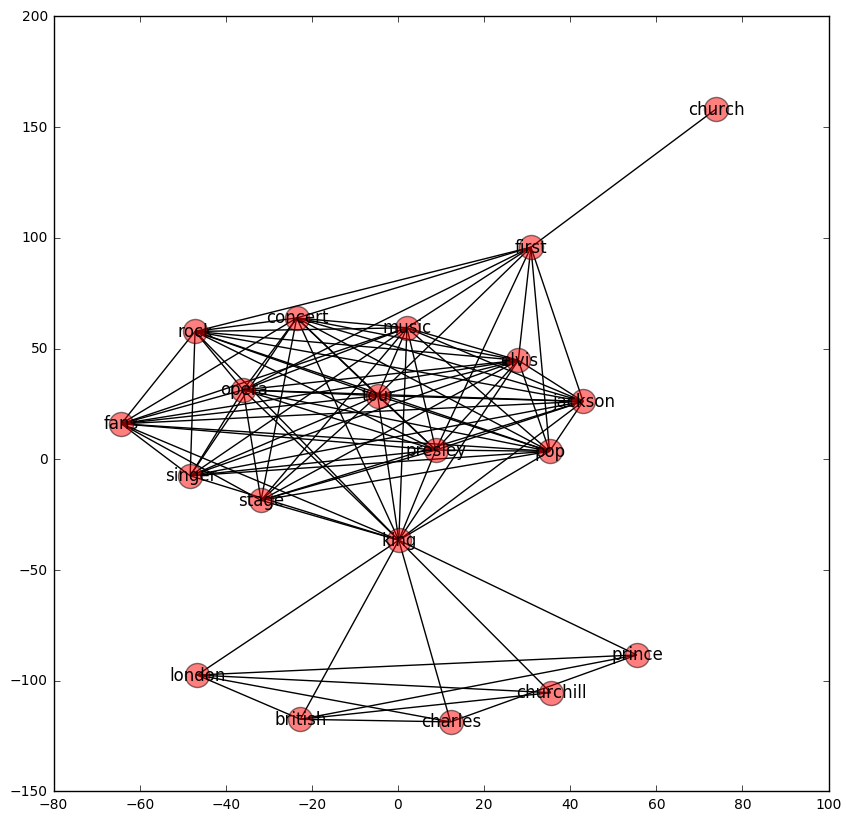

In [22]:
e.visualize_graph('music')

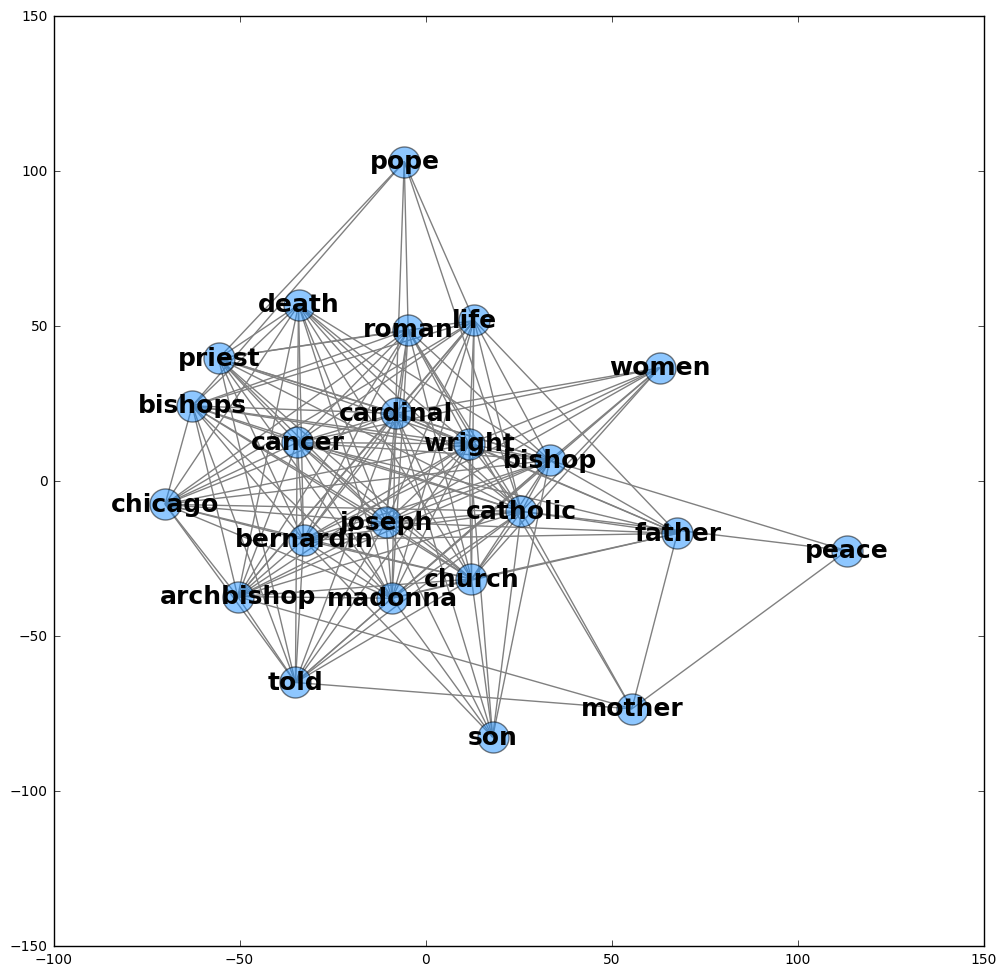

In [41]:
e.visualize_graph('church', node_color='dodgerblue', layout='graphviz', figsize=(12, 12))

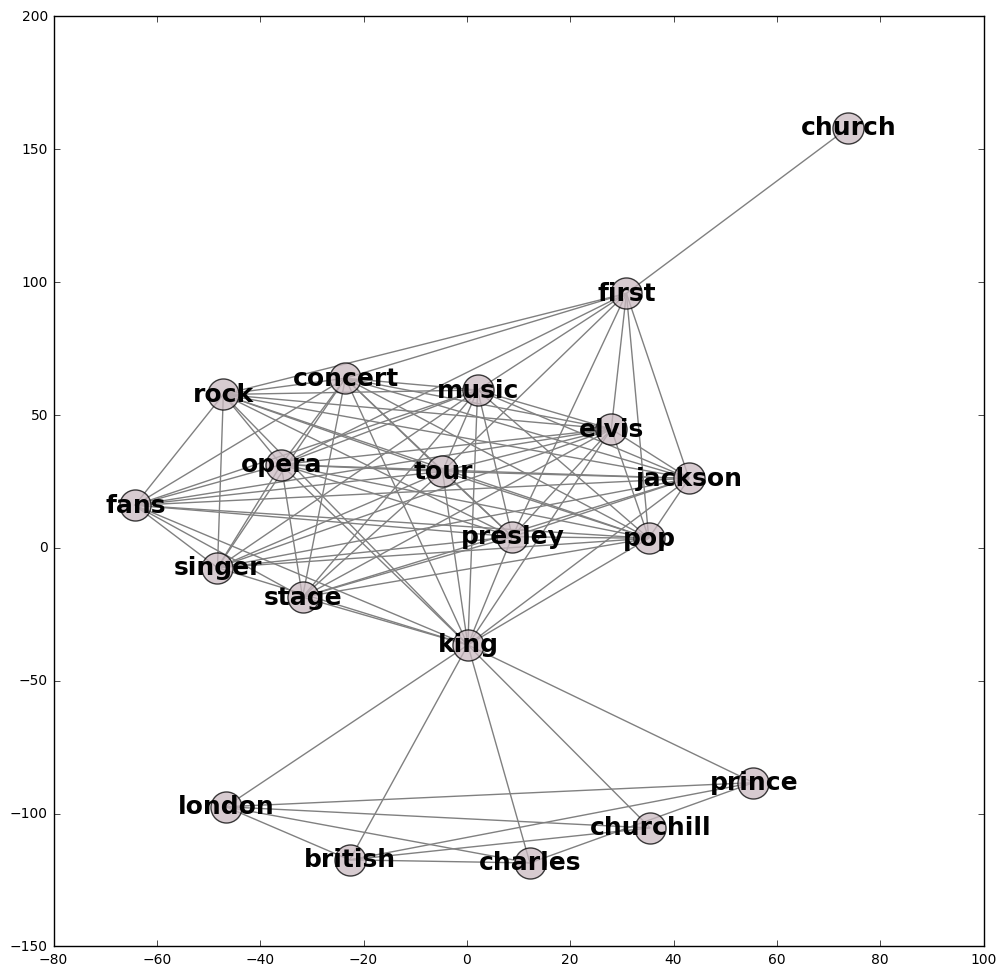

In [43]:
e.visualize_graph('elvis', layout='graphviz', figsize=(12, 12), alpha=0.75)

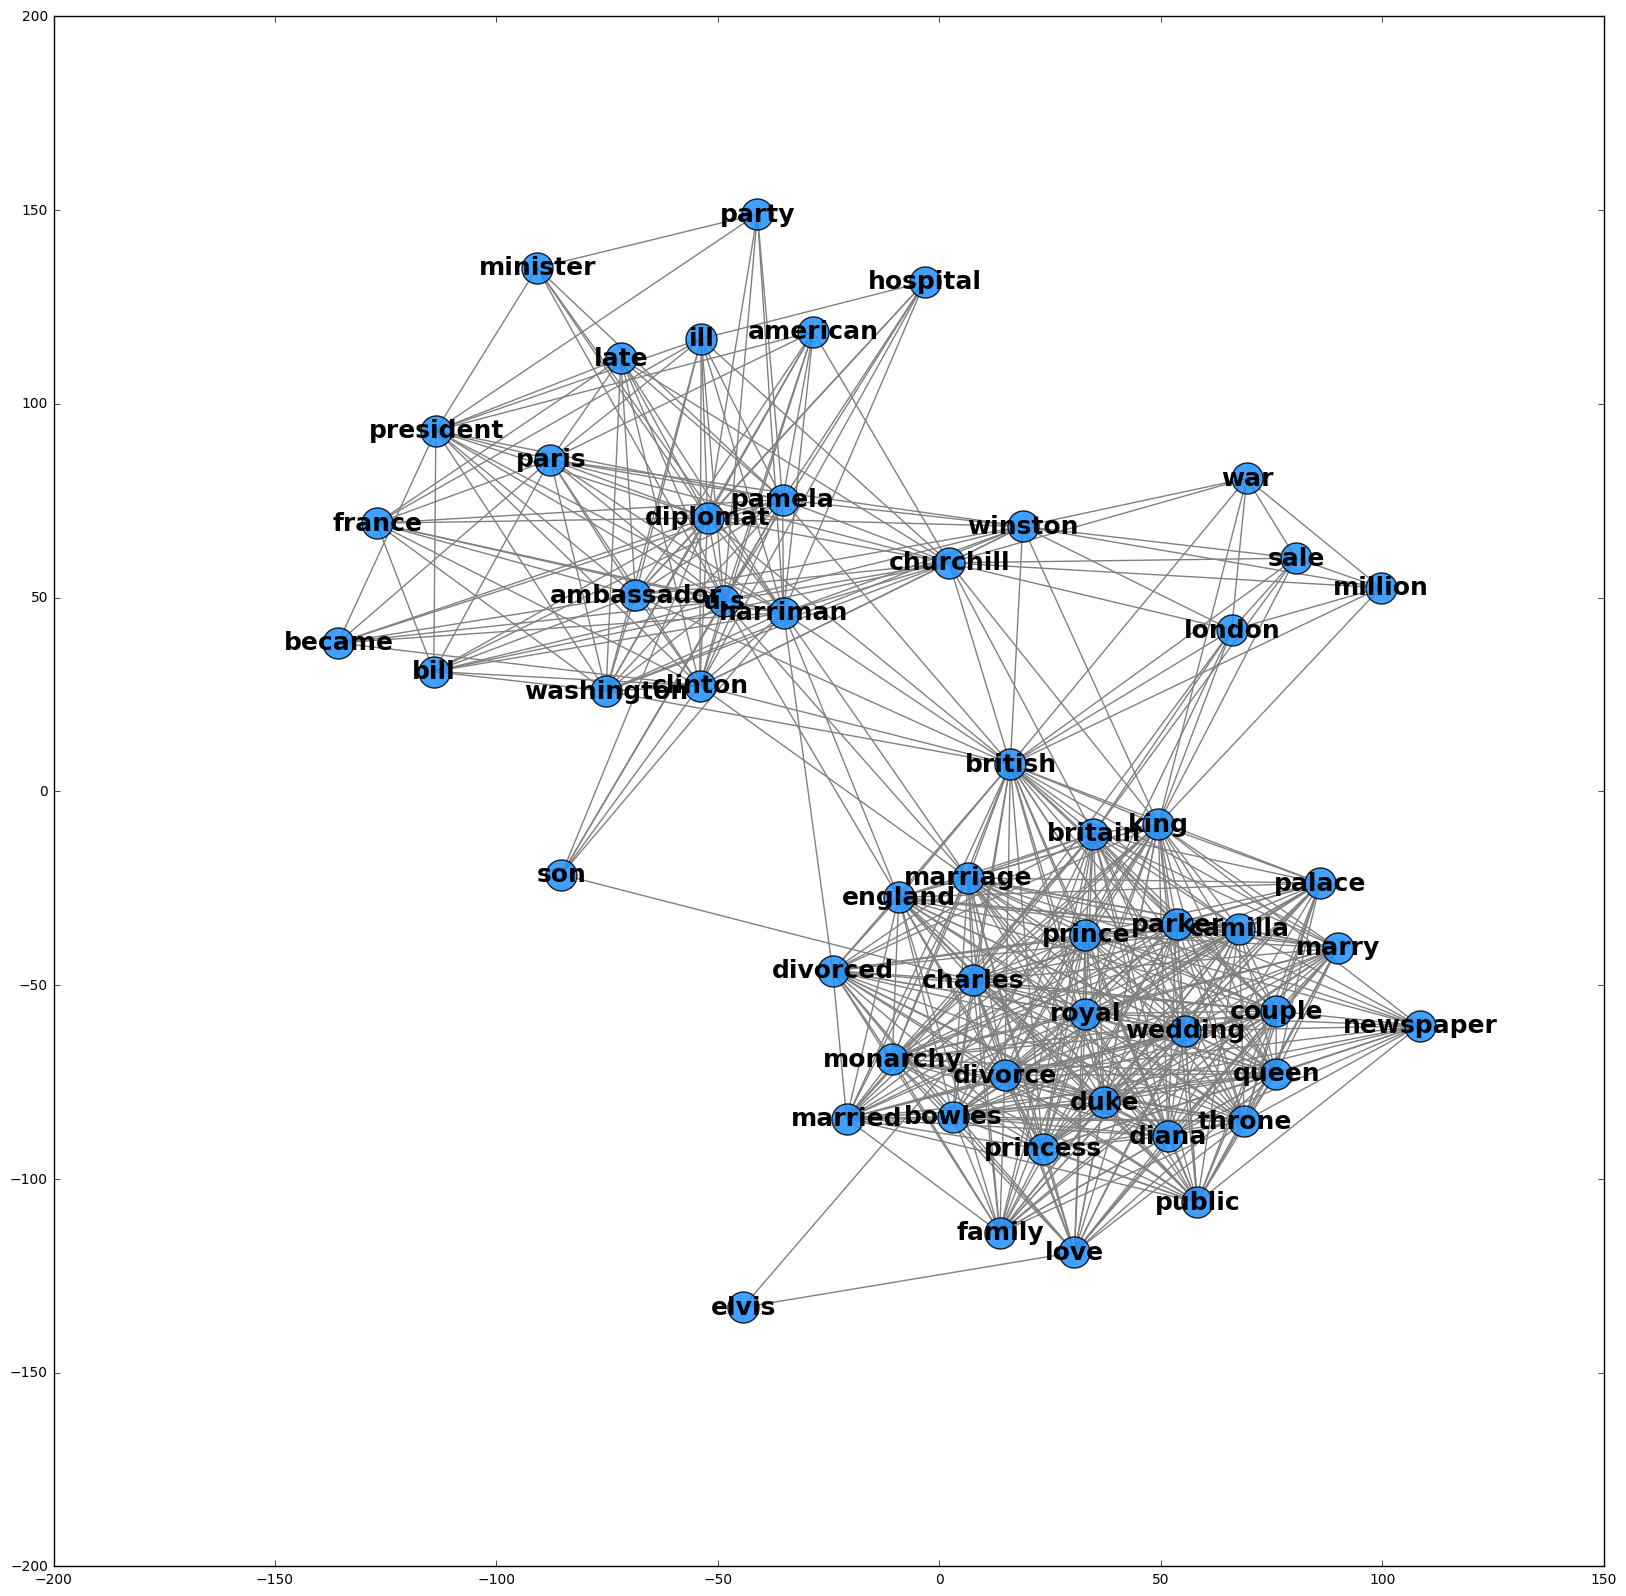

In [58]:
e.visualize_graph('england', node_color='dodgerblue', layout='graphviz', figsize=(20, 20), alpha=0.85)